### Autoencoders
- An autoencoder is a special type of neural network that is trained to copy its input to its output.
- **For example**, given an image of a Fasion Wears, an autoencoder first encodes the image into a lower dimensional latent representation, then decodes the latent representation back to an image. An autoencoder learns to compress the data while minimizing the reconstruction error. 

## Import libraries

In [10]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf

from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.model_selection import train_test_split
import keras
from keras.layers import Dense, Input
from keras.datasets import fashion_mnist
from keras.models import Model

## Load the dataset
Load the Fashion MNIST dataset

In [16]:
(x_train, _), (x_test, _) = fashion_mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

print(x_train.shape)
print(x_test.shape)

(60000, 28, 28)
(10000, 28, 28)


### Plot random image from x test and x train

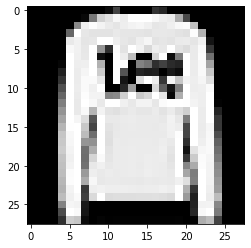

In [17]:
plt.imshow(x_test[1])
plt.gray()

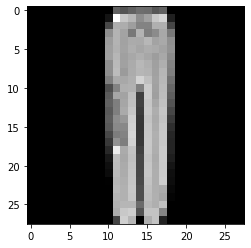

In [7]:
plt.imshow(x_train[1000])
plt.gray();

### Reshape the Data

In [18]:
x_train = x_train.reshape(len(x_train), np.prod(x_train.shape[1:]))
x_test = x_test.reshape(len(x_test), np.prod(x_test.shape[1:]))
print(x_train.shape)
print(x_test.shape)

(60000, 784)
(10000, 784)


### There are 4 hyperparameters that we need to set before training an autoencoder:
1. **Code size**: number of nodes in the middle layer. Smaller size results in more compression.
2. **Number of layers**: the autoencoder can be as deep as we like.
3. **Number of nodes per layer**: the autoencoder architecture we’re working on is called a stacked autoencoder since the layers are stacked one after another. Usually stacked autoencoders look like a “sandwitch”. The number of nodes per layer decreases with each subsequent layer of the encoder, and increases back in the decoder. Also the decoder is symmetric to the encoder in terms of layer structure.
4. **Loss function**: we either use mean squared error (mse) or binary crossentropy. If the input values are in the range [0, 1] then we typically use crossentropy, otherwise we use the mean squared error.

In [19]:
#Creating Encoder Layers
input_img= Input(shape=(784,))
encoder=Dense(units=128, activation='relu')(input_img)  # Infusion input_img into ANN 
encoder=Dense(units=64, activation='relu')(encoder)
encoder=Dense(units=32, activation='relu')(encoder)

#Check the Encoded Layers
encoded = Model(input_img, encoder)

#Creating Decoder Layers
decode=Dense(units=32, activation='relu')(encoder)
decode=Dense(units=64, activation='relu')(decode)
decode=Dense(units=128, activation='relu')(decode)
decode=Dense(units=784, activation='sigmoid')(decode)

#Create Final autoencoder model
autoencoder=Model(input_img, decode)

#Summary of AutoEncoded model
autoencoder.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 784)]             0         
                                                                 
 dense_7 (Dense)             (None, 128)               100480    
                                                                 
 dense_8 (Dense)             (None, 64)                8256      
                                                                 
 dense_9 (Dense)             (None, 32)                2080      
                                                                 
 dense_10 (Dense)            (None, 32)                1056      
                                                                 
 dense_11 (Dense)            (None, 64)                2112      
                                                                 
 dense_12 (Dense)            (None, 128)               8320

### Compile Autoencoded Model

In [20]:
autoencoder.compile(optimizer='adam', loss=keras.losses.MeanSquaredError(), metrics='mean_squared_error')

### Fit and Train the model
- Train the model using `x_train` as both the input and the target. The `encoder` will learn to compress the dataset from 784 dimensions to the latent space, and the `decoder` will learn to reconstruct the original images.
.

In [21]:
autoencoder.fit(x_train, x_train,
                epochs=50,
                shuffle=True,
                validation_data=(x_test, x_test))

Epoch 1/50
1875/1875 [==============================] - 9s 4ms/step - loss: 0.0271 - mean_squared_error: 0.0271 - val_loss: 0.0191 - val_mean_squared_error: 0.0191
Epoch 2/50
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0176 - mean_squared_error: 0.0176 - val_loss: 0.0164 - val_mean_squared_error: 0.0164
Epoch 3/50
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0158 - mean_squared_error: 0.0158 - val_loss: 0.0151 - val_mean_squared_error: 0.0151
Epoch 4/50
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0147 - mean_squared_error: 0.0147 - val_loss: 0.0143 - val_mean_squared_error: 0.0143
Epoch 5/50
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0140 - mean_squared_error: 0.0140 - val_loss: 0.0138 - val_mean_squared_error: 0.0138
Epoch 6/50
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0135 - mean_squared_error: 0.0135 - val_loss: 0.0132 - val_mean_squared_error: 0.0132
Epoch 7/50
1875/

### Check the Original, Encoded and Decoded Images
Now that the model is trained, let's test it by encoding and decoding images from the test set.

In [22]:
encoded_imgs = encoded.predict(x_test)
decoded_imgs = autoencoder.predict(x_test)

313/313 [==============================] - 1s 2ms/step


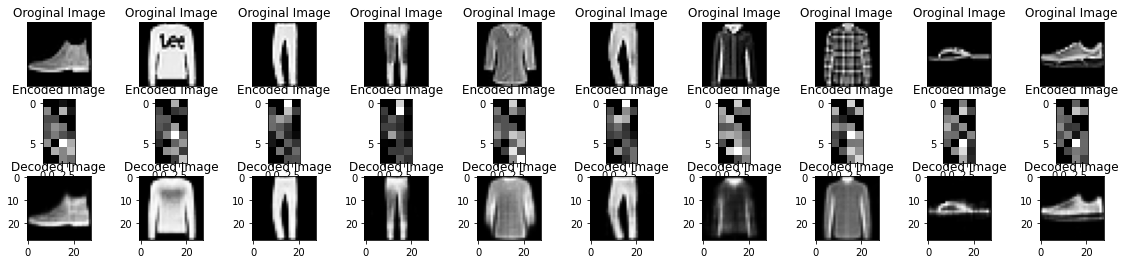

In [23]:
plt.figure(figsize=(40, 4))
for i in range(10):
    ax=plt.subplot(3,20, i+1)
    plt.imshow(x_test[i].reshape(28,28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    plt.title("Oroginal Image")
    
    plt.subplot(3,20, i+1+20)
    plt.imshow(encoded_imgs[i].reshape(8,4))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    plt.title("Encoded Image")
    
    plt.subplot(3,20, i+1+2*20)
    plt.imshow(decoded_imgs[i].reshape(28,28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    plt.title("Decoded Image") 
plt.show()